# Test Convolution and AveragePool3D in pytorch

In [ ]:
import torch
import numpy as np

In [ ]:
torchc3d = torch.nn.Conv3d(1,1,3, stride=1)

In [ ]:
print(torchc3d.weight) #Probably all values are random
# For some reason there are 5 square brakets for a 3D array

In [ ]:
print(torchc3d.bias)

In [ ]:
kernel = torch.FloatTensor(  [
    [ [1,1,1],[1,1,1],[1,1,1] ] ,
    [ [1,1,1],[1,1,1],[1,1,1] ] ,
    [ [1,1,1],[1,1,1],[1,1,1] ]
])

In [ ]:
print (kernel)

In [ ]:
torchc3d.weight=torch.nn.Parameter(kernel)

To set the weights , we need to use command torch.nn.Parameter()

In [ ]:
print(torchc3d.weight)

Try convolution with a numpy 3d array

In [ ]:
data3d = np.random.rand(64,64,64) 

In [ ]:
result = torchc3d(torch.from_numpy(data3d))

### Try without setting weights

In [ ]:
import torch
import numpy as np

torchc3d = torch.nn.Conv3d(1,1,3)
data3d = np.random.rand(64,64,64) 
result = torchc3d(torch.from_numpy(data3d))

### Try by setting the input array using torch's commands

In [ ]:
import torch
import numpy as np

torchc3d = torch.nn.Conv3d(1,1,3)
data3d = torch.randn(16,16,16)
result = torchc3d(data3d)

### Try on 2D data
https://gist.github.com/anirudhshenoy/089a70deed944d0ca7ab0b6a5eb5a7f1

In [ ]:
import torch
import numpy as np

torchc = torch.nn.Conv2d(1,1,2)
data2d = torch.randn(16,16)
result = torchc(data2d)

In [ ]:
import torch
import numpy as np

torchc = torch.nn.Conv2d(1,1,2)
data2d = torch.randint(low=0, high=10, size=(1, 1, 16, 16),  dtype=torch.float32)
#conv.weight = torch.nn.Parameter(torch.randint( low=0, high=10, size=(1, 1, 2, 2),  dtype=torch.float32))
result = torchc(data2d)

In [ ]:
print(data2d)

### 3D random input, not setting weights

In [ ]:
import torch
import numpy as np

torchc3d = torch.nn.Conv3d(1,1,3)
data3d = torch.randn(1,1,16,16,16)
result = torchc3d(data3d)

#THIS WORKS

In [ ]:
print(result)

### 3D random input, setting weights

In [ ]:
import torch
import numpy as np

torchc3d = torch.nn.Conv3d(1,1,3)
data3d = torch.randn(1,1,16,16,16)

#Weights
kernel = torch.FloatTensor(  [[[
    [ [1,1,1],[1,1,1],[1,1,1] ] ,
    [ [1,1,1],[1,1,1],[1,1,1] ] ,
    [ [1,1,1],[1,1,1],[1,1,1] ]
]]])

torchc3d.weight=torch.nn.Parameter(kernel)


result = torchc3d(data3d)


In [ ]:
print(result)

TODO: This seems to be working. Next step is to create a function that accepts weights and data as numpy arrays, and converts in a form that will let the PyTorch Conv3d run, like this last one.

In [19]:
#data3d_np = np.random.randn(16,16,16)
data3d_np = np.random.randn(16,16,16).astype("float32")
kernel3d_np = np.ones((3,3,3), dtype="float32")

In [21]:
print(data3d_np.dtype)
print(kernel3d_np.dtype)

float32
float32


In [24]:
#convert to torch objects
#data3d_np_ext = np.expand_dims( np.expand_dims(data3d_np, axis=0), axis=0 )
#data3d_torch = torch.from_numpy(data3d_np_ext)
data3d_torch = torch.unsqueeze( torch.unsqueeze( torch.from_numpy(data3d_np),0),0 )
print (data3d_torch)

tensor([[[[[-4.2537e-01, -9.2597e-01,  4.1433e-01,  ...,  1.0706e+00,
             9.4585e-01, -1.7605e+00],
           [ 5.7484e-01, -9.9626e-01,  6.5452e-01,  ...,  6.0691e-01,
            -5.6169e-01,  5.2161e-01],
           [ 8.2278e-02,  3.7732e-01, -2.6987e-03,  ..., -6.8486e-01,
            -1.8102e-01, -2.3457e+00],
           ...,
           [ 4.9114e-01, -1.9348e-01, -2.1160e+00,  ...,  4.7609e-01,
             1.4489e+00, -5.5557e-01],
           [ 1.0141e+00,  5.4293e-01,  2.0422e+00,  ..., -6.1257e-01,
            -4.2495e-01, -2.2129e-01],
           [-6.4271e-01, -5.3290e-01, -4.0179e-01,  ...,  2.8644e-01,
             1.6828e+00, -1.8782e-01]],

          [[-2.3808e+00, -3.7517e-02,  1.4540e+00,  ...,  2.8042e-01,
            -1.2620e+00, -1.2847e+00],
           [-6.0491e-01,  5.6539e-01,  2.3916e+00,  ..., -1.6141e+00,
            -5.5705e-01,  2.0926e+00],
           [-5.0416e-01, -4.3787e-01,  6.0639e-01,  ...,  1.9070e+00,
            -8.7639e-01, -2.1340e+00],
 

In [25]:
#kernel3d_np_ext =  np.expand_dims( np.expand_dims(kernel3d_np, axis=0), axis=0 )
#kernel3d_torch = torch.from_numpy(kernel3d_np_ext)
kernel3d_torch = torch.unsqueeze( torch.unsqueeze( torch.from_numpy(kernel3d_np),0),0 )
print(kernel3d_torch)

tensor([[[[[1., 1., 1.],
           [1., 1., 1.],
           [1., 1., 1.]],

          [[1., 1., 1.],
           [1., 1., 1.],
           [1., 1., 1.]],

          [[1., 1., 1.],
           [1., 1., 1.],
           [1., 1., 1.]]]]])


In [26]:
torchc3d = torch.nn.Conv3d(1,1, 3)

In [27]:
torchc3d.weight=torch.nn.Parameter(kernel3d_torch)

In [28]:
result = torchc3d(data3d_torch)

In [29]:
print(result)

tensor([[[[[-1.9574e+00,  9.5691e-01,  1.6780e+00,  ..., -2.9410e+00,
            -1.4933e+00, -6.6517e+00],
           [-2.7487e+00, -4.4085e+00, -2.9763e+00,  ..., -3.0730e+00,
            -9.3372e-01, -3.0064e+00],
           [-2.3534e+00, -1.7303e+00, -2.3485e+00,  ...,  2.9891e+00,
             6.5597e+00, -2.1235e+00],
           ...,
           [-8.3885e+00, -1.0493e+01, -9.3238e+00,  ...,  6.9370e+00,
             8.1915e+00,  7.8284e+00],
           [ 2.8926e-02, -3.2369e+00, -2.7890e+00,  ...,  3.0223e+00,
             1.9477e+00,  2.2703e+00],
           [ 3.3223e+00, -2.9114e+00, -2.9496e-01,  ..., -1.3918e+00,
             3.2414e+00,  1.5070e+00]],

          [[ 1.7963e+00,  2.9715e+00,  6.2415e+00,  ..., -5.6925e+00,
            -2.2851e+00, -4.6934e+00],
           [-3.9913e+00, -3.0522e+00,  2.2155e+00,  ..., -8.1325e-01,
             3.3352e+00,  7.5058e-01],
           [-5.9657e+00, -5.2719e+00, -1.5072e+00,  ...,  7.7789e+00,
             1.3025e+01,  6.6012e+00],
 

In [30]:
result0 = result.cpu().detach().numpy()[0][0]

In [31]:
print (result0)

[[[-1.95742667e+00  9.56905842e-01  1.67803216e+00 ... -2.94098949e+00
   -1.49328327e+00 -6.65165234e+00]
  [-2.74866533e+00 -4.40853024e+00 -2.97626662e+00 ... -3.07302427e+00
   -9.33724523e-01 -3.00641489e+00]
  [-2.35339499e+00 -1.73029804e+00 -2.34850478e+00 ...  2.98905945e+00
    6.55971766e+00 -2.12346172e+00]
  ...
  [-8.38848305e+00 -1.04925146e+01 -9.32377243e+00 ...  6.93695641e+00
    8.19152451e+00  7.82838440e+00]
  [ 2.89263129e-02 -3.23690772e+00 -2.78902936e+00 ...  3.02232242e+00
    1.94765007e+00  2.27029800e+00]
  [ 3.32228279e+00 -2.91142607e+00 -2.94961929e-01 ... -1.39176559e+00
    3.24141788e+00  1.50704467e+00]]

 [[ 1.79634678e+00  2.97145438e+00  6.24153996e+00 ... -5.69251680e+00
   -2.28509283e+00 -4.69339037e+00]
  [-3.99130630e+00 -3.05221462e+00  2.21553326e+00 ... -8.13254952e-01
    3.33522296e+00  7.50584543e-01]
  [-5.96570921e+00 -5.27191830e+00 -1.50721502e+00 ...  7.77892113e+00
    1.30254555e+01  6.60119057e+00]
  ...
  [-8.48026371e+00 -3.2

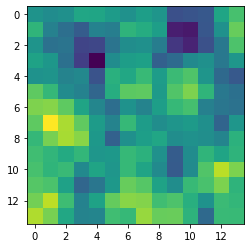

In [35]:
import matplotlib.pyplot as plt
plt.imshow(result0 [:,:,0])

### try the same but using GPU

In [37]:
data3d_np = np.random.randn(16,16,16).astype("float32")
kernel3d_np = np.ones((3,3,3), dtype="float32")
  
#https://medium.com/ai³-theory-practice-business/use-gpu-in-your-pytorch-code-676a67faed09
if torch.cuda.is_available():  
  dev = "cuda:0" 
else:  
  dev = "cpu"  
device = torch.device(dev)
    
#data3d_np_ext = np.expand_dims( np.expand_dims(data3d_np, axis=0), axis=0 )
#data3d_torch = torch.from_numpy(data3d_np_ext).to(device)
data3d_torch = torch.unsqueeze( torch.unsqueeze( torch.from_numpy(data3d_np),0),0 ).to(device)
kernel3d_torch = torch.unsqueeze( torch.unsqueeze( torch.from_numpy(kernel3d_np),0),0 ).to(device)


In [46]:
print(data3d_torch.type())
print(kernel3d_torch.type())

torch.cuda.FloatTensor
torch.cuda.FloatTensor


In [47]:
torchc3d = torch.nn.Conv3d(1,1, 3)
torchc3d.weight=torch.nn.Parameter(kernel3d_torch).to(device)

In [49]:
print(torchc3d.weight.type())

torch.cuda.FloatTensor


In [50]:
result = torchc3d(data3d_torch)
result0 = result.cpu().detach().numpy()[0][0]

RuntimeError: Input type (torch.cuda.FloatTensor) and bias type (torch.FloatTensor) should be the same

In [12]:
print(data3d_np.dtype)

float32


### In a function

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import time

def Conv3DPytorch(data3d_np , kernel3d_np ):

    #convert to torch objects
    data3d_torch = torch.unsqueeze( torch.unsqueeze( torch.from_numpy(data3d_np),0),0 )
    kernel3d_torch = torch.unsqueeze( torch.unsqueeze( torch.from_numpy(kernel3d_np),0),0 )
    
    #setup torch calculation
    torchc3d = torch.nn.Conv3d(1,1, 3, bias=False)
    torchc3d.weight=torch.nn.Parameter(kernel3d_torch)
    
    result = torchc3d(data3d_torch)
    
    return result.cpu().detach().numpy()[0][0]

def Conv3DPytorchGPU(data3d_np , kernel3d_np ):
    #This version gives a weird error
    #Actually, it does not use the GPU
    #Probably because parameters are not passed to GPU explicitly
    
    assert torch.cuda.is_available(), "CUDA not available, terminating..."
    
    torch.set_default_tensor_type('torch.cuda.FloatTensor')
    
    #convert to torch objects
    data3d_torch = torch.unsqueeze( torch.unsqueeze( torch.from_numpy(data3d_np),0),0 )
    kernel3d_torch = torch.unsqueeze( torch.unsqueeze( torch.from_numpy(kernel3d_np),0),0 )
    
    #setup torch calculation
    torchc3d = torch.nn.Conv3d(1,1, 3, bias=False)
    torchc3d.weight=torch.nn.Parameter(kernel3d_torch)
    
    result = torchc3d(data3d_torch)
    
    return result.cpu().detach().numpy()[0][0]

def Conv3DPytorchGPU_1(data3d_np , kernel3d_np ):
    #This code seems to be working
    #Explecit declaration of data types of torch.FloatTensor before sending to GPU
    #This is probably unnecessary
    assert torch.cuda.is_available(), "CUDA not available, terminating..."
    
    cudadev= torch.cuda.current_device()
    
    #convert to torch objects
    data3d_torch = torch.unsqueeze( torch.unsqueeze( torch.from_numpy(data3d_np),0),0 ).type("torch.FloatTensor").to(cudadev)
    kernel3d_torch = torch.unsqueeze( torch.unsqueeze( torch.from_numpy(kernel3d_np),0),0 ).type("torch.FloatTensor").to(cudadev)
    
    #Problem with data types
    
    
    #setup torch calculation
    torchc3d = torch.nn.Conv3d(1,1, 3, bias=False)
    torchc3d.weight=torch.nn.Parameter(kernel3d_torch)
    
    result = torchc3d(data3d_torch)
    
    return result.cpu().detach().numpy()[0][0]

def Conv3DPytorchGPU_2(data3d_np , kernel3d_np ):
    
    #Working ok. simpler
    assert torch.cuda.is_available(), "CUDA not available, terminating..."
    
    #convert to torch objects, and to gpu using cuda()
    data3d_torch = torch.unsqueeze( torch.unsqueeze( torch.from_numpy(data3d_np),0),0 ).cuda()
    kernel3d_torch = torch.unsqueeze( torch.unsqueeze( torch.from_numpy(kernel3d_np),0),0 ).cuda()
    
    #setup torch calculation
    torchc3d = torch.nn.Conv3d(1,1, 3, bias=False)
    torchc3d.weight=torch.nn.Parameter(kernel3d_torch)
    
    result = torchc3d(data3d_torch)
    
    return result.cpu().detach().numpy()[0][0]


In [2]:
#Delta dirac type data at mod locations

#Create data
w0=512 #width of input array
w1 = int(w0/2)
mod0= 8 #every mod0 indexes

x_mg, y_mg, z_mg = np.mgrid[0:w0 , 0:w0 , 0:w0]

#data3d_np = ((x_mg==w1)*(y_mg==w1)*(z_mg==w1) )*1.0
data3d_np = ( ( np.mod(x_mg,mod0)==0 ) * ( np.mod(y_mg,mod0)==0 ) * ( np.mod(z_mg,mod0)==0 ) )*1.0

In [3]:
#data3d_np

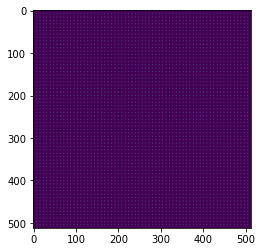

In [4]:
plt.imshow(data3d_np[:,:,w1])

In [5]:
#kernel
#Create data
w0=16 #width of input array
w1 = int(w0/2)
w2 = int(w0/4)

x_mg, y_mg, z_mg = np.mgrid[-w1:w1 , -w1:w1 , -w1:w1]

kernel3d_np = ( (np.abs(x_mg)<=w2)*(np.abs(y_mg)<=w2)*(np.abs(z_mg)<=w2) )*1.0 

In [6]:
#kernel3d_np

In [7]:
res0=Conv3DPytorch(data3d_np , kernel3d_np)

RuntimeError: [enforce fail at CPUAllocator.cpp:64] . DefaultCPUAllocator: can't allocate memory: you tried to allocate 458670768128 bytes. Error code 12 (Cannot allocate memory)


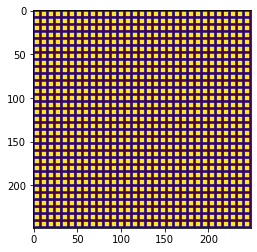

In [18]:
plt.imshow(res0[:,:, int(res0.shape[0]/2) ])

In [9]:
res0GPU=Conv3DPytorchGPU(data3d_np , kernel3d_np)

RuntimeError: [enforce fail at CPUAllocator.cpp:64] . DefaultCPUAllocator: can't allocate memory: you tried to allocate 458670768128 bytes. Error code 12 (Cannot allocate memory)


Did not use GPU!!

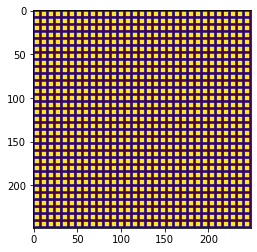

In [20]:
plt.imshow(res0GPU[:,:, int(res0GPU.shape[0]/2) ])

In [10]:
torch.cuda.empty_cache()

In [6]:
res0GPU_1 = Conv3DPytorchGPU_1(data3d_np , kernel3d_np)

Very fast!! Uses GPU briefly for 1 sec

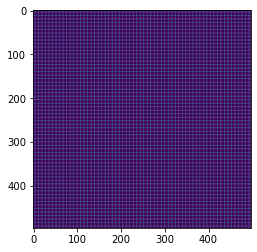

In [7]:
plt.imshow(res0GPU_1[:,:, int(res0GPU_1.shape[0]/2) ])

In [11]:
torch.cuda.empty_cache()

In [9]:
res0GPU_2 = Conv3DPytorchGPU_2(data3d_np , kernel3d_np)

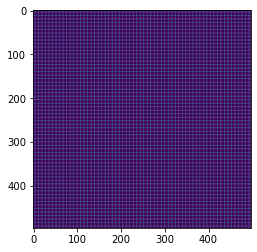

In [10]:
plt.imshow(res0GPU_2[:,:, int(res0GPU_2.shape[0]/2) ])

In [21]:
#Get profile information
%prun Conv3DPytorch(data3d_np , kernel3d_np)

#### Timing

In [16]:
torch.cuda.empty_cache()

tic = time.perf_counter()
res0=Conv3DPytorch(data3d_np , kernel3d_np)
t_res0 = time.perf_counter()-tic

torch.cuda.empty_cache()

tic = time.perf_counter()
res0GPU=Conv3DPytorchGPU(data3d_np , kernel3d_np)
t_res0GPU = time.perf_counter()-tic

torch.cuda.empty_cache()

tic = time.perf_counter()
res0GPU_1 = Conv3DPytorchGPU_1(data3d_np , kernel3d_np)
t_res0GPU_1 = time.perf_counter()-tic

torch.cuda.empty_cache()

tic = time.perf_counter()
res0GPU_2 = Conv3DPytorchGPU_2(data3d_np , kernel3d_np)
t_res0GPU_2 = time.perf_counter()-tic

print("t_res0 = ", t_res0)
print("t_res0GPU = ", t_res0GPU)
print("t_res0GPU_1 = ", t_res0GPU_1)
print("t_res0GPU_2 = ", t_res0GPU_2)

RuntimeError: [enforce fail at CPUAllocator.cpp:64] . DefaultCPUAllocator: can't allocate memory: you tried to allocate 458670768128 bytes. Error code 12 (Cannot allocate memory)


In [ ]:
#Compare with scikit convolution
#WARNING, it may take very long for large volume sizes
import scipy.ndimage

res_scipy = scipy.ndimage.convolve(data3d_np, kernel3d_np, mode='constant', cval=0.0)
plt.imshow(res_scipy[:,:, int(res_scipy.shape[0]/2)])
#Looks similar, as expected

# Pytorch Conv3D in GPU CUDA with strides

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
#Create data

#Delta dirac type data at mod locations
w0=64 #width of input array
w1 = int(w0/2)
mod0= 8 #every mod0 indexes

x_mg, y_mg, z_mg = np.mgrid[0:w0 , 0:w0 , 0:w0]

#data3d_np = ((x_mg==w1)*(y_mg==w1)*(z_mg==w1) )*1.0
data3d_np = ( ( np.mod(x_mg,mod0)==0 ) * ( np.mod(y_mg,mod0)==0 ) * ( np.mod(z_mg,mod0)==0 ) )*1.0


#kernel
w0=8 #width of input array
w1 = int(w0/2)
w2 = int(w0/4)

x_mg, y_mg, z_mg = np.mgrid[-w1:w1 , -w1:w1 , -w1:w1]

kernel3d_np = ( (np.abs(x_mg)<=w2)*(np.abs(y_mg)<=w2)*(np.abs(z_mg)<=w2) )*1.0


In [3]:
def Conv3DPytorchGPU_WStride(data3d_np , kernel3d_np, stride0 ):

    assert torch.cuda.is_available(), "CUDA not available, terminating..."
    
    #convert to torch objects, and to gpu using cuda()
    data3d_torch = torch.unsqueeze( torch.unsqueeze( torch.from_numpy(data3d_np),0),0 ).cuda()
    kernel3d_torch = torch.unsqueeze( torch.unsqueeze( torch.from_numpy(kernel3d_np),0),0 ).cuda()
    
    #setup torch calculation
    torchc3d = torch.nn.Conv3d(1,1, 3, bias=False, stride= stride0)
    torchc3d.weight=torch.nn.Parameter(kernel3d_torch)
    
    result = torchc3d(data3d_torch)
    
    return result.cpu().detach().numpy()[0][0]

In [9]:
stride0 = 3
res_strided_0 = Conv3DPytorchGPU_WStride(data3d_np , kernel3d_np, stride0)

shape: (19, 19, 19)


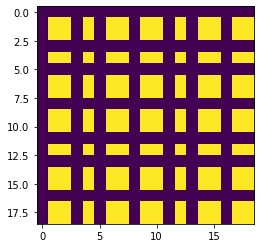

In [12]:
plt.imshow(res_strided_0[:,:, int(res_strided_0.shape[0]/2) ])
print("shape:" , res_strided_0.shape)

shape: (19, 19, 19)


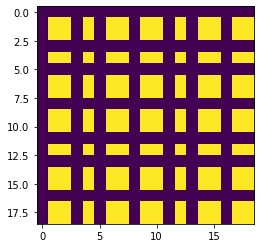

In [13]:
plt.imshow(res_strided_0[:, int(res_strided_0.shape[0]/2) ,:])
print("shape:" , res_strided_0.shape)

# Using PyTorch AvgPool3D
This may be a better solution instead of using the convolution with a volume of ones
The kernel does not need to be defined, but only de size is needed.

https://pytorch.org/docs/stable/generated/torch.nn.AvgPool3d.html

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import time

In [29]:
def AvgPool3DPytorchGPU(data3d_np , kwidth=8 , stride0=1):

    assert torch.cuda.is_available(), "CUDA not available, terminating..."
    
    #convert to torch objects, and to gpu using cuda()
    data3d_torch = torch.unsqueeze( torch.unsqueeze( torch.from_numpy(data3d_np),0),0 ).cuda()
    
    #setup torch calculation
    torchc3d = torch.nn.AvgPool3d(kwidth, stride0)
    
    result = torchc3d(data3d_torch)
    
    return result.cpu().detach().numpy()[0][0]

def show_halfwayZslice(data3d):
    plt.imshow( data3d[:, :,int(data3d.shape[0]/2) ] )
    print("shape:" , data3d.shape, "slice:", int(data3d.shape[0]/2))

shape: (1000, 1000, 1000) slice: 500


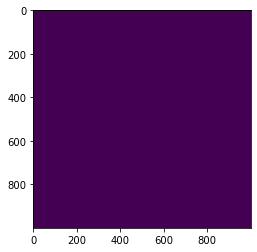

In [61]:
#Create data

#boxes
w0=1000 #width of input array
w1 = int(w0/2)
mod0= 8 #every mod0 indexes
mod0_2 = int(mod0/4)

x_mg, y_mg, z_mg = np.mgrid[0:w0 , 0:w0 , 0:w0]
#This will fail if the array size is large

#data3d_np = ((x_mg==w1)*(y_mg==w1)*(z_mg==w1) )*1.0
data3d_np = ( ( np.mod(x_mg,mod0)  <= mod0_2 ) *
              ( np.mod(y_mg,mod0)  <= mod0_2 ) * 
              ( np.mod(z_mg,mod0)  <= mod0_2 ) )*1.0

show_halfwayZslice(data3d_np)

In [62]:
res_avgpool_0 = AvgPool3DPytorchGPU(data3d_np, 7)

shape: (994, 994, 994) slice: 497


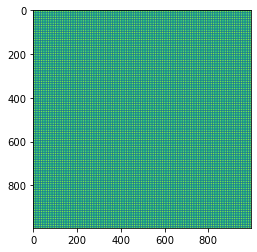

In [63]:
show_halfwayZslice(res_avgpool_0)

## testing

In [9]:
#creating a large array with random values

w0=1024 #width of input array
data3d_np_rnd = np.random.rand(w0,w0,w0)

#2000
#MemoryError: Unable to allocate 59.6 GiB for an array with shape (2000, 2000, 2000) and data type float64

#1024 OK creating data

#show_halfwayZslice(data3d_np_rnd)

In [10]:
#data 1024, kernel 256, stride 64. OK
#data 1024, kernel 256, stride 1. Very long
#data 1024, kernel 256, stride 32. OK. about 4sec
#data 1024, kernel 256, stride 16. OK. about 25 sec
#data 1024, kernel 256, stride 16. OK. about >1min
res_avgpool_0 = AvgPool3DPytorchGPU(data3d_np_rnd, 256, 8)

shape: (97, 97, 97) slice: 48


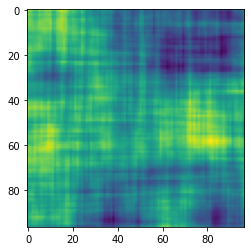

In [11]:
show_halfwayZslice(res_avgpool_0)

In [12]:
import psutil

In [13]:
psutil.virtual_memory()

svmem(total=92919050240, available=76816400384, percent=17.3, used=15069630464, free=47873855488, active=18058203136, inactive=25500127232, buffers=95113216, cached=29880451072, shared=199647232, slab=1046892544)

## testing (512x512x512)

shape: (33, 33, 33) slice: 16


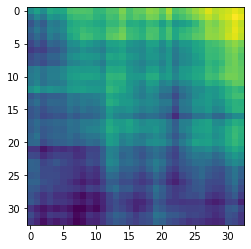

In [45]:
#creating a large array with random values

w0=512 #width of input array
data3d_np_rnd = np.random.rand(w0,w0,w0)

res_avgpool_512_256_8 = AvgPool3DPytorchGPU(data3d_np_rnd, 256, 8)
show_halfwayZslice(res_avgpool_512_256_8)